#### Observable Trends
1. First
2. Second
3. Third

#### WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

##### Your objective is to build a series of scatter plots to showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude


##### Your final notebook must:
* Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.


##### As final considerations:
* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* See Example Solution for a reference on expected format.

In [35]:
# dependencies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from config import weather_api_key
!pip install citipy
from citipy import citipy
import random

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:
# API details
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [37]:
# generate random latitude and longitude list for sample cities
lat_coords = random.sample(list(range(-180, 180)), 10)
print(lat_coords)
lon_coords = random.sample(list(range(-180, 180)), 10)
print(lon_coords)

[72, 151, -166, 82, 106, -19, -89, -72, 131, 145]
[18, -126, 138, -117, -79, 41, -129, 15, -145, -93]


In [38]:
# create list of cities from random lat and lon coordinates
cities = []

for x in range(len(lat_coords)):
    city = citipy.nearest_city(lat_coords[x],lon_coords[x])
    cities.append(city.city_name)
    
print(cities)

['tromso', 'tuktoyaktuk', 'bluff', 'norman wells', 'qaanaaq', 'angoche', 'rikitea', 'bredasdorp', 'barrow', 'qaanaaq']


In [39]:
# set up lists to hold reponse info
city_name = []
latitude = []
temp = []
humidity = []
clouds = []
wind = []

# build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [40]:
# loop through the list of cities and perform a request for data on each
record = 1
for city in cities:
    print(query_url + city)
    print(f"City Name: {city}, Record number {record}")
    record += 1
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        latitude.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except (KeyError):
        pass

print(city_name)
print(latitude)
print(temp)
print(humidity)
print(clouds)
print(wind)

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=tromso
City Name: tromso, Record number 1
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=tuktoyaktuk
City Name: tuktoyaktuk, Record number 2
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=bluff
City Name: bluff, Record number 3
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=norman wells
City Name: norman wells, Record number 4
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=qaanaaq
City Name: qaanaaq, Record number 5
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=angoche
City Name: angoche, Record number 6
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=rikitea
City Name

In [41]:
# create a data frame to hold weather data
weather_dict = {
    "City": city_name,
    "Latitude": latitude,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind
}

weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv("WeatherData.csv", index=False)

weather_data.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Tromso,69.65,-8.29,48,0,18.50
1,Tuktoyaktuk,69.44,-31.00,67,5,5.10
2,Bluff,-23.58,29.57,52,80,7.96
3,Norman Wells,65.28,-34.00,66,20,2.10
4,Qaanaaq,77.48,-29.18,87,0,2.51


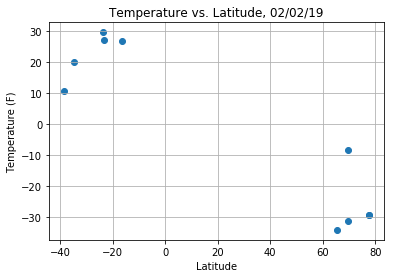

In [42]:
# build a scatter plot for Temperature (F) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")

plt.title("Temperature vs. Latitude, 02/02/19")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TempVsLat.png")

# Show plot
plt.show()

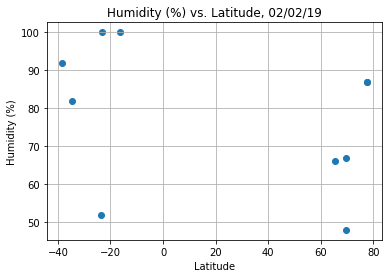

In [43]:
# build a scatter plot for Humidity (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

plt.title("Humidity (%) vs. Latitude, 02/02/19")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityVsLat.png")

# Show plot
plt.show()

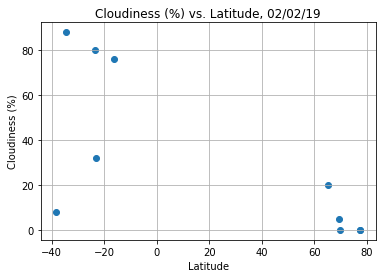

In [44]:
# build a scatter plot for Cloudiness (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

plt.title("Cloudiness (%) vs. Latitude, 02/02/19")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudsVsLat.png")

# Show plot
plt.show()

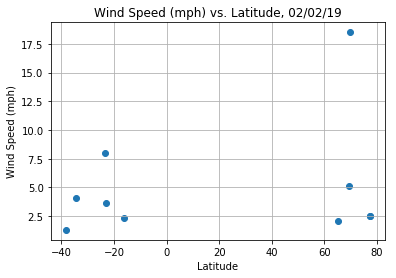

In [45]:
# build a scatter plot for Wind Speed (mph) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

plt.title("Wind Speed (mph) vs. Latitude, 02/02/19")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindVsLat.png")

# Show plot
plt.show()